# Main Problem
$$\frac{dy}{dx}+(x+\frac{1+3x^2}{1+x+x^3})y=x^3+2x+x^2(\frac{1+3x^2}{1+x+x^3}) \quad x \in (0,1)$$
$$y(0)=1$$

# Regression-based ANN

In [33]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [34]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

In [35]:
def polynomial_regression(x, y, degree):
    p = Polynomial.fit(x, y, degree)
    return p.convert().coef

In [36]:
def forward_Euiler(x,N):
  x0 = 1
  y0 = 0
  xf = 2
  deltax = ( xf-x0 ) / (N-1)
  x = np.linspace( x0 , xf , N)
  y = np.zeros( [ N ] )
  y[0] = y0
  for i in range ( 1 , N ) :
    y [ i ] = y[i-1] + deltax*( 4*x[i-1] - 3 - (3/x[i-1])*y[i-1] )
    #deltax*( -(x[i-1]+(1+3*(x[i-1])**2)/(1+x[i-1]+(x[i-1])**3))*y[i-1]+(x[i-1])**3+2*x[i-1]+(x[i-1])**2*((1+3*(x[i-1])**2)/(1+x[i-1]+(x[i-1])**3))) + y[i-1]
  return y

In [37]:
# Neural network based on polynomial regression
def neural_network(params, x, degree):
    w_hidden = params[0]
    w_output = params[1]

    for i in range(0,1):
      h_0 = sigmoid(w_hidden[i]*x**i)
      r_0 = w_output[i]*h_0
      h_1 = sigmoid(w_hidden[i+1]*x**(i+1))
      r_1 = w_output[i+1]*h_1
      h_2 = sigmoid(w_hidden[i+2]*x**(i+2))
      r_2 = w_output[i+2]*h_2
      h_3 = sigmoid(w_hidden[i+3]*x**(i+3))
      r_3 = w_output[i+3]*h_3
      h_4 = sigmoid(w_hidden[i+4]*x**(i+4))
      r_4 = w_output[i+4]*h_4
      h_5 = sigmoid(w_hidden[i+5]*x**(i+5))
      r_5 = w_output[i+5]*h_5
      h_6 = sigmoid(w_hidden[i+6]*x**(i+6))
      r_6 = w_output[i+6]*h_6

    z_output = r_0+r_1+r_2+r_3+r_4+r_5+r_6
    x_output = z_output
    return x_output

In [38]:
# The trial solution using the deep neural network:
def g_trial(x, params, degree, g0 = 0):
    return g0 + (x-1)*neural_network(params,x,degree)

In [39]:
# The right side of the ODE:
def g(x, g_trial):
    return 4*x-3-(3/x)*g_trial
    #-(x+(1+3*x**2)/(1+x+x**3))*g_trial+x**3+2*x+x**2*((1+3*x**2)/(1+x+x**3))

In [40]:
# The cost function:
def cost_function(P, x, degree):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial(x,P,degree)

    # Find the derivative w.r.t x of the trial function
    d_g_t = elementwise_grad(g_trial,0)(x,P,degree)

    # The right side of the ODE
    func = g(x, g_t)

    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

In [41]:
def solve_ode_neural_network(x, y, degree, num_neurons_hidden, num_iter, lmb):
    ## Set up initial weights
    P0 = polynomial_regression(x, y, degree)
    P1 = npr.randn(degree+1)

    P = [P0, P1]

    print('Initial cost: %g'%cost_function(P, x, degree))

    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        cost_grad =  cost_function_grad(P, x, degree)

        P[0] = P[0] - lmb * cost_grad[0]
        P[1] = P[1] - lmb * cost_grad[1]
        if i % 1000 == 0:
            print('Final cost: %g'%cost_function(P, x, degree))

    return P

In [42]:
# Solve the given problem
if __name__ == '__main__':
    npr.seed(15)

    N = 50
    x = np.linspace(1, 2, N)
    degree = 6
    num_iter = 10000
    lmb = 0.001
    # Use the network
    y = forward_Euiler(x,N)
    P = solve_ode_neural_network(x, y, degree, N, num_iter, lmb)

Initial cost: 52.4686
Final cost: 48.5301
Final cost: 0.0244893
Final cost: 0.0213858
Final cost: 0.019505
Final cost: 0.0182241
Final cost: 0.0172619
Final cost: 0.0164855
Final cost: 0.0158291
Final cost: 0.0152578
Final cost: 0.0147514


In [43]:
def exact(x):
  return (4/5)*x**2 - (3/4)*x - 1/(20*pow(x,3))

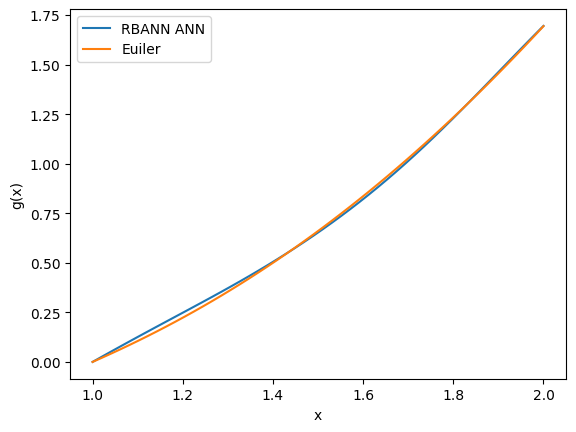

In [44]:
# Plot the results
res = g_trial(x, P, degree)
plt.plot(x, res, label = 'RBANN ANN')
plt.plot(x, exact(x), label = 'Euiler')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.show()